# Air Quality Index

### Task-                            
###  1)To identify the Most polluted City 
###  2)Create a Model to Predict the quality of air

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#aqi

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('city_day.csv',parse_dates = ["Date"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Features
-->City    
-->Date   
-->PM2.5 (Particulate Matter 2.5-micrometer)              
-->PM10 (Particulate Matter 10-micrometer)              
-->SO2 (Sulphur Dioxide)            
-->NOx (Any Nitric x-oxide)       
-->NH3 (Ammonia)        
-->CO (Carbon Monoxide)        
-->O3 (Ozone or Trioxygen)        
-->Benzene         
-->Toluene      
-->Xylene     
-->AQI           
-->AQI_Bucket                 


<Axes: >

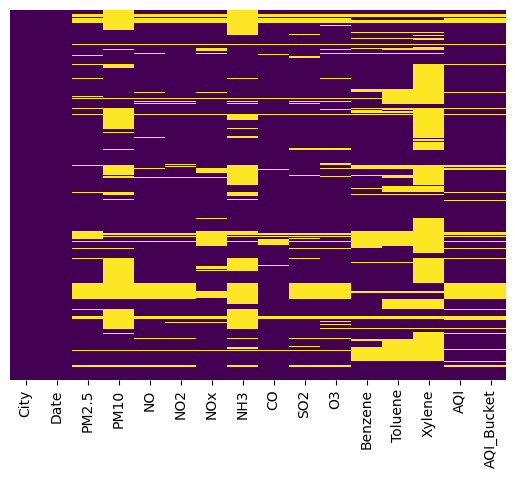

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [8]:
df.describe() # but it gives the information about all the cities alltogether

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.271059,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.806616,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.070000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

C:\Users\Praveen Patel\AppData\Local\Temp\ipykernel_36592\1167282342.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=df['Date'].apply(pd.to_datetime)


In [10]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

### filling the Nan values present in the pollutants with mean (city wise)

In [11]:

# df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
# Select numeric columns for filling missing values
numeric_columns = df.columns[1:13]  # Assuming columns 1 to 12 are numeric

# Filter numeric columns based on dtype
numeric_columns = df[numeric_columns].select_dtypes(include=np.number).columns

# Fill missing values with the mean of each groupa
df[numeric_columns] = df.groupby("City")[numeric_columns].transform(lambda x: x.fillna(x.mean()))


In [12]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


In [13]:
# df.iloc[:, 1:13]=df.fillna(df.mean())
# df
# Step 1: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Step 2: Exclude non-numeric columns when computing the mean
numeric_df = df.drop(columns=non_numeric_columns)
numeric_mean = numeric_df.mean()

# Fill NaN values with mean
df.fillna(numeric_mean, inplace=True)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,166.463581,NaN
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,166.463581,NaN
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,166.463581,NaN
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,166.463581,NaN
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory


### The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO and O3 the maximum value in last 8-hrs is used.

-->Each measure is converted into a Sub-Index based on pre-defined groups.

-->Sometimes measures are not available due to lack of measuring or lack of required data points.

-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

###  calculating Sub-Index

In [14]:


# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))



### Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [15]:

df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

In [16]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,166.463581,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,166.463581,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,166.463581,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,166.463581,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,166.463581,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.000000,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.000000,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.000000,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


# AQI Bucket


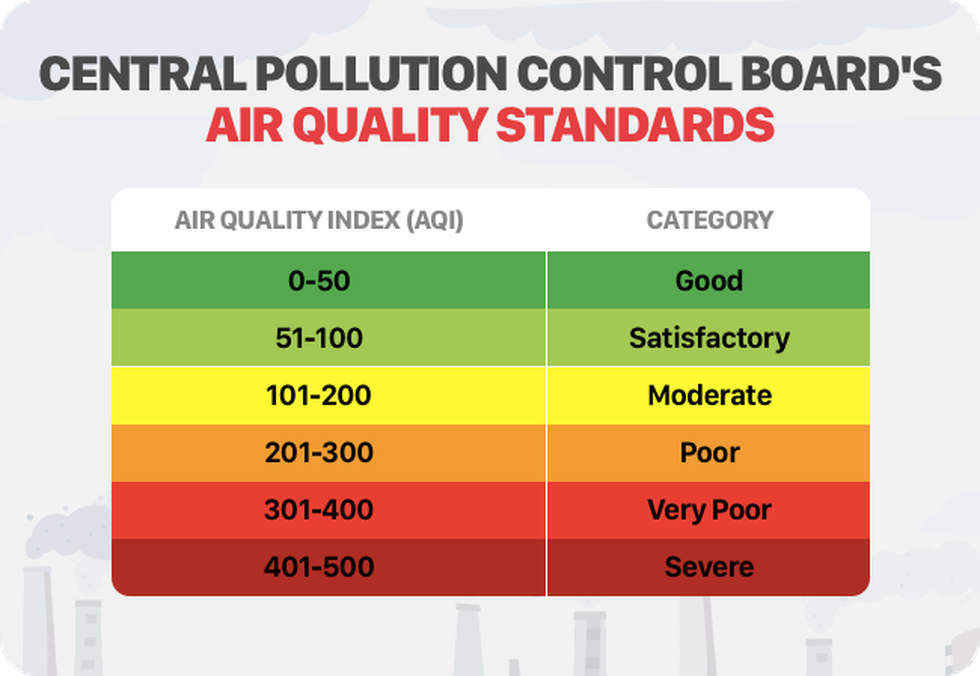

In [17]:
from IPython import display 
display.Image("__results___16_0.png",width = 400, height = 200)

### calculating AQI bucket and filling the NAN value present

In [18]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))


In [19]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,166.463581,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,166.463581,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,166.463581,Moderate,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,166.463581,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,166.463581,Moderate,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.000000,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.000000,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.000000,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [20]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [21]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

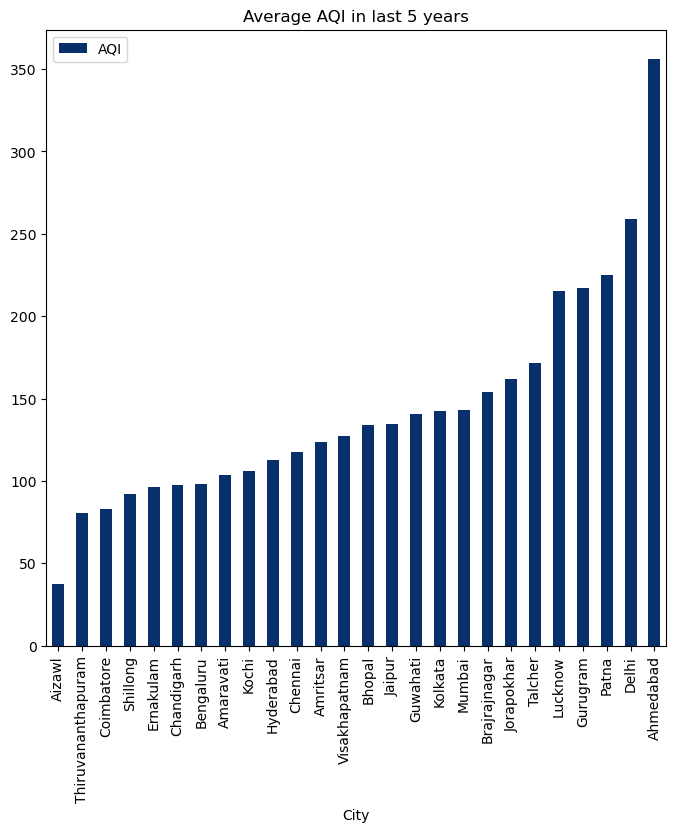

In [22]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

#### By above graph we can conclude that Ahmedabad is the heighest polluted city followed by Delhi and Gurugram

### Creating Model for predicting the Output

In [23]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2015-01-01,166.463581,Moderate
2015-02-01,166.463581,Moderate
2015-03-01,166.463581,Moderate
2015-04-01,166.463581,Moderate
2015-05-01,166.463581,Moderate
...,...,...
2020-06-27,41.000000,Good
2020-06-28,70.000000,Satisfactory
2020-06-29,68.000000,Satisfactory


In [24]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [25]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2015-01-01,166.463581,2
2015-02-01,166.463581,2
2015-03-01,166.463581,2
2015-04-01,166.463581,2
2015-05-01,166.463581,2


In [26]:
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")
warnings.filterwarnings("ignore", message="Conversion of an array with ndim > 0 to a scalar is deprecated")


## Predicting the values of AQI_Bucket w.r.t values of AQI using Linear regression

In [27]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the dataset into features (X) and target variable (y)
X = final_df[['AQI']]
y = final_df['AQI_Bucket']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)


Training R^2 score: 0.7428196921748729
Testing R^2 score: 0.7804193774433694


In [29]:
# Prompt user to enter AQI value
print("Predict AQI using Linear regression:")
print("Enter the value of AQI:")
AQI = float(input("AQI : "))

# Predict the AQI bucket
output = model.predict([[AQI]])

# Map the predicted value to AQI bucket categories
aqi_buckets = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
predicted_bucket = aqi_buckets[int(output)]

# Display the predicted AQI bucket
print("Predicted AQI bucket:", predicted_bucket)


Predict AQI using Linear regression:
Enter the value of AQI:


AQI :  23


Predicted AQI bucket: Good


## Predicting the values of AQI_Bucket w.r.t values of AQI using decision tree model


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluating the Decision Tree model
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print("Decision Tree Training accuracy:", dt_train_score)
print("Decision Tree Testing accuracy:", dt_test_score)


Decision Tree Training accuracy: 1.0
Decision Tree Testing accuracy: 1.0


In [31]:
# Prompt user to enter AQI value
print("Predict AQI using Decision tree:")
print("Enter the value of AQI:")
AQI = float(input("AQI : "))

# Predict the AQI bucket
output = dt_model.predict([[AQI]])

# Map the predicted value to AQI bucket categories
aqi_buckets = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
predicted_bucket = aqi_buckets[int(output)]

# Display the predicted AQI bucket
#345 example

print("Predicted AQI bucket:", predicted_bucket)

Predict AQI using Decision tree:
Enter the value of AQI:


AQI :  23


Predicted AQI bucket: Good


## Predicting the values of AQI_Bucket w.r.t values of AQI using Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the Random Forest model
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print("Random Forest Training accuracy:", rf_train_score)
print("Random Forest Testing accuracy:", rf_test_score)


Random Forest Training accuracy: 1.0
Random Forest Testing accuracy: 1.0


In [33]:
# Prompt user to enter AQI value
print("Predict AQI using random forest:")
print("Enter the value of AQI:")
AQI = float(input("AQI : "))

# Predict the AQI bucket
output = rf_model.predict([[AQI]])

# Map the predicted value to AQI bucket categories
aqi_buckets = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
predicted_bucket = aqi_buckets[int(output)]

# Display the predicted AQI bucket
#345 example

print("Predicted AQI bucket:", predicted_bucket)

Predict AQI using random forest:
Enter the value of AQI:


AQI :  23


Predicted AQI bucket: Good


# Predicting the values of AQI_Bucket w.r.t values of AQI using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Creating and training the Random Forest model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluating the Random Forest model
lr_train_score = lr_model.score(X_train, y_train)
lr_test_score = lr_model.score(X_test, y_test)

print("Random Forest Training accuracy:", lr_train_score)
print("Random Forest Testing accuracy:", lr_test_score)

Random Forest Training accuracy: 0.9984761259735861
Random Forest Testing accuracy: 0.9986456746233282


C:\Users\Praveen Patel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:

# Prompt user to enter AQI value
print("Predict AQI using random forest:")
print("Enter the value of AQI:")
AQI = float(input("AQI : "))

# Predict the AQI bucket
output = lr_model.predict([[AQI]])

# Map the predicted value to AQI bucket categories
aqi_buckets = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
predicted_bucket = aqi_buckets[int(output)]

# Display the predicted AQI bucket
#345 example

print("Predicted AQI bucket:", predicted_bucket)

Predict AQI using random forest:
Enter the value of AQI:


AQI :  34


Predicted AQI bucket: Good


 # Predicting AQI

In [36]:
dfx = df

In [37]:
features = ['PM10_SubIndex','PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex','CO_SubIndex', 'O3_SubIndex']

In [38]:
dfx

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,166.463581,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,166.463581,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,166.463581,Moderate,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,166.463581,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,166.463581,Moderate,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.000000,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.000000,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.000000,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler
for col in features:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(dfx[[col]])
    dfx[col] = scaled

In [40]:
dfx

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,166.463581,Moderate,0.098277,0.131529,0.245157,0.046618,0.065341,0.000000,0.480536
2015-02-01,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,166.463581,Moderate,0.098277,0.131529,0.217918,0.043876,0.065341,0.000000,0.110000
2015-03-01,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,166.463581,Moderate,0.098277,0.131529,0.263317,0.079525,0.065341,0.244019,0.097059
2015-04-01,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,166.463581,Moderate,0.098277,0.131529,0.163438,0.046618,0.065341,0.040670,0.116471
2015-05-01,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,166.463581,Moderate,0.098277,0.131529,0.354116,0.101463,0.065341,0.267943,0.126176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.000000,Good,0.044944,0.026661,0.072639,0.052102,0.034091,0.000000,0.074412
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.000000,Satisfactory,0.066517,0.042658,0.108959,0.043876,0.031250,0.000000,0.097059
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.000000,Satisfactory,0.058427,0.039103,0.072639,0.049360,0.028409,0.000000,0.097059


In [41]:
def remove_outliers_iqr(df):
    # For each column, calculate the IQR and remove outliers
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataframe
df_cleaned = remove_outliers_iqr(dfx)

# Display the cleaned dataframe
print(df_cleaned.head())

                 City      PM2.5        PM10    NO    NO2    NOx        NH3  \
Date                                                                          
2015-04-01  Ahmedabad  67.854497  114.584029  1.70  18.48  17.97  23.024137   
2015-07-16  Ahmedabad  65.370000  114.584029  0.64   8.07   8.57  23.024137   
2015-07-17  Ahmedabad  56.280000  114.584029  0.60   8.02   8.51  23.024137   
2015-07-18  Ahmedabad  48.170000  114.584029  0.65   8.00   8.55  23.024137   
2015-07-19  Ahmedabad  33.560000  114.584029  0.72   7.89   8.56  23.024137   

              CO    SO2     O3  ...  Xylene         AQI    AQI_Bucket  \
Date                            ...                                     
2015-04-01  1.70  18.59  36.08  ...    1.00  166.463581      Moderate   
2015-07-16  0.64  16.31   8.02  ...    0.28  105.000000      Moderate   
2015-07-17  0.60  18.93   6.20  ...    0.29  101.000000      Moderate   
2015-07-18  0.65  18.99   7.97  ...    0.12   93.000000  Satisfactory   
2015-07-

In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13348 entries, 2015-04-01 to 2020-01-07
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            13348 non-null  object 
 1   PM2.5           13348 non-null  float64
 2   PM10            13348 non-null  float64
 3   NO              13348 non-null  float64
 4   NO2             13348 non-null  float64
 5   NOx             13348 non-null  float64
 6   NH3             13348 non-null  float64
 7   CO              13348 non-null  float64
 8   SO2             13348 non-null  float64
 9   O3              13348 non-null  float64
 10  Benzene         13348 non-null  float64
 11  Toluene         13348 non-null  float64
 12  Xylene          13348 non-null  float64
 13  AQI             13348 non-null  float64
 14  AQI_Bucket      13348 non-null  object 
 15  PM10_SubIndex   13348 non-null  float64
 16  PM2.5_SubIndex  13348 non-null  float64
 17  SO2_SubIndex  

In [43]:
# x = dfx[['PM10_SubIndex','PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex','CO_SubIndex', 'O3_SubIndex']]
# y = dfx['AQI']

In [44]:
x = df_cleaned[['PM10_SubIndex','PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex','CO_SubIndex', 'O3_SubIndex']]
y = df_cleaned['AQI']

# LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 24.08221169218792
R-squared (R2): 0.4678243708272499
Root Mean Squared Error (RMSE): 31.7869350564161


# DecisionTreeRegressor

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Assuming x_train, y_train, x_test, y_test are already defined

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Fit the regressor on the training data
dt_regressor.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared (R2) for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train MAE: 0.20494025919553885
Test MAE: 18.93988970089026
Train R-squared (R2): 0.9945895272527342
Test R-squared (R2): 0.4604887024610379
Train RMSE: 3.2384933467180677
Test RMSE: 32.00526556786782


# RandomForestRegressor

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming x_train, y_train, x_test, y_test are already defined

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Fit the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = rf_regressor.predict(x_train)
y_test_pred = rf_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared (R2) for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train MAE: 5.235473056850829
Test MAE: 13.970401155489142
Train R-squared (R2): 0.9590508999696234
Test R-squared (R2): 0.7106209872773384
Train RMSE: 8.90938205597034
Test RMSE: 23.43984193837457


# XGBRegressor

In [54]:
import xgboost as xg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create XGBoost Regressor object
xgb_r = xg.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Train the model using the training data
xgb_r.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = xgb_r.predict(x_train)
y_test_pred = xgb_r.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)


Train RMSE: 20.947336997712316
Test RMSE: 24.068153201639003
Train MAE: 13.963419248892803
Test MAE: 15.798685747426218
Train R-squared (R2): 0.7736362735544099
Test R-squared (R2): 0.6948992975353974


# BaggingRegressor

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Bagging Regressor model with DecisionTreeRegressor as base estimator
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=101)

# Train the model using the training data
bagging_model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = bagging_model.predict(x_train)
y_test_pred = bagging_model.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)


Train RMSE: 8.900386799943073
Test RMSE: 23.494539431453838
Train MAE: 5.239764618383119
Test MAE: 14.014629478406093
Train R-squared (R2): 0.9591335458114
Test R-squared (R2): 0.7092688643002303


In [56]:
features

['PM10_SubIndex',
 'PM2.5_SubIndex',
 'SO2_SubIndex',
 'NOx_SubIndex',
 'NH3_SubIndex',
 'CO_SubIndex',
 'O3_SubIndex']

# inputs

In [65]:
inputs = []

for val in features:
    val = float(input(f'Enter the value of {val}'))
    inputs.append(val)

Enter the value of PM10_SubIndex 23
Enter the value of PM2.5_SubIndex 23
Enter the value of SO2_SubIndex 23
Enter the value of NOx_SubIndex 233
Enter the value of NH3_SubIndex 23
Enter the value of CO_SubIndex 23
Enter the value of O3_SubIndex 32


In [66]:
pred = rf_regressor.predict([inputs])


# output

In [67]:
print(f'{pred} - {get_AQI_bucket(pred)}')

[223.65] - Poor
